# Assignment: Network Measurements and Analysis of the Tor Network Using Open Data

## Objective
The assignment aims to explore Tor network measurements using publicly available datasets and metrics, focusing on understanding usage patterns, performance, censorship effects, and the impact of pluggable transports.

## Assignment Workflow
1. **Background Research and Familiarization**
   - Study the Tor network architecture, including relays, entry guards, exit nodes, and pluggable transports.
   - Understand the privacy and ethical considerations when measuring Tor data, referencing guidelines from Tor research literature [5], [8].
   - Review available open data sources such as Tor Metrics, CollecTor archives, and datasets like GTT23 [1], [4], [6], [7].

2. **Data Collection (5 points)**
   - Access Tor Metrics website and download relevant datasets (e.g., relay statistics, user counts by country, exit traffic by port) [1], [6].
   - Obtain the GTT23 dataset for genuine Tor traffic traces if advanced circuit-level analysis is planned [4], [7].
   - Explore additional tools like OnionPerf and Torperf for performance measurements [2], [3].

3. **Data Processing and Privacy Preservation (6 points)**
   - Use provided libraries such as Stem, the official Tor Project Python library for parsing Tor descriptors, consensuses, and controlling a Tor process [6].
   - Ensure no sensitive user data is exposed; work with aggregated or anonymized statistics.
   - Follow recommended practices to avoid possible deanonymization risks [5], [8].

4. **Interpretation and Reporting (9 points)**
   - Discuss findings in relation to Tor’s goals of anonymity and censorship resistance.
   - Reflect on limitations due to data aggregation and privacy constraints.
   - Suggest improvements or further research directions based on results.

## Potential Research Questions
- How does the usage of pluggable transports vary across different countries and time periods? Are there correlations with censorship events?
- Can sudden drops in Tor connections be linked to known political upheavals or Internet disruptions in specific regions?
- What are the predominant exit ports used in the Tor network, and what does this imply about user behavior and application usage?
- How does the performance of Tor (measured by OnionPerf or Torperf) fluctuate during periods of increased censorship or network interference?

## Research Question
We will examine Tor exit traffic usage and network performance, comparing global trends to Germany. Specifically, we ask: How does the distribution of exit traffic (by destination port) and download performance (via TorPerf/OnionPerf) differ globally versus for Germany? For example, we can analyze the most-used exit ports (e.g. 80, 443, etc.) and see if German users rely on different services. We will then correlate these usage patterns with Tor performance metrics (download times, latencies) to see if usage changes coincide with measurable performance differences. By contrasting Germany to the global average, we can highlight regional variations in Tor usage and quality of service.

## Data Sources and Tools
We will use open Tor data wherever possible:

- **Tor Metrics Portal**: Provides historical aggregates of users (by country), relay counts, bandwidth, exit traffic, and performance. Nearly all graphs have downloadable CSV data.
- **CollecTor Archives**: Tor’s CollecTor service archives raw data such as TorPerf/OnionPerf results and network descriptors. 
- **Stem library**: The Python Stem library can parse Tor consensus and descriptor archives.
- **GTT23 Dataset (optional)**: A recent dataset of “genuine Tor traces” collected at exit relays.

All sources of data are aggregated or permissioned to ensure privacy. We will work with country-level and time-series statistics only, avoiding any raw IP-level data. Tools like Pandas and requests in Python will automate data download and processing.

### 1. Setup and Dependencies

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

### 2. Data Collection
Here we collect all the necessary data from the different sources.

In [2]:
# 1. Download Tor user counts (relay users) for all countries and Germany
print("1. Downloading Tor user counts...")
url_all = "https://metrics.torproject.org/userstats-relay-country.csv?country=all&start=2023-01-01&end=2023-12-31"
url_de  = "https://metrics.torproject.org/userstats-relay-country.csv?country=de&start=2023-01-01&end=2023-12-31"
df_global = pd.read_csv(url_all, comment='#')
df_germany = pd.read_csv(url_de, comment='#')
print("Global user stats:")
print(df_global.head())
print("German user stats:")
print(df_germany.head())

# 2. Download TorPerf performance data (public server, 50 KiB file)
print("2. Downloading TorPerf data...")
url_perf = "https://metrics.torproject.org/torperf.csv?filesize=50kb&server=public&start=2023-01-01&end=2023-12-31"
df_perf = pd.read_csv(url_perf, comment='#')
print(df_perf.head())

# 3. Fetch a sample Onionoo archive from CollecTor
print("3. Fetching Onionoo data for German exit relays...")
onnx_url = "https://onionoo.torproject.org/summary?flag=Exit&country=DE"
resp = requests.get(onnx_url)
exits_de = resp.json()['relays']
df_exits_de = pd.DataFrame(exits_de)
print(f"Found {len(df_exits_de)} exit relays in Germany.")
print(df_exits_de.head())

# 4. Get the Data out of README.csv for the Timeline metric
print("4. Processing Metrics Timeline...")
df_timeline = pd.read_csv("README.csv")
print(df_timeline.head())


1. Downloading Tor user counts...
Global user stats:
         date  country    users  lower  upper  frac
0  2023-01-01      NaN  2156347    NaN    NaN    77
1  2023-01-02      NaN  2352735    NaN    NaN    51
2  2023-01-07      NaN  2297430    NaN    NaN    75
3  2023-01-08      NaN  2329057    NaN    NaN    75
4  2023-01-09      NaN  2464609    NaN    NaN    52
German user stats:
         date country   users     lower     upper  frac
0  2023-01-01      de  270842  193511.0  411613.0    77
1  2023-01-02      de  290858  207029.0  385956.0    51
2  2023-01-07      de  301504  193575.0  394225.0    75
3  2023-01-08      de  309498  187023.0  410522.0    75
4  2023-01-09      de  307327  189441.0  436780.0    52
2. Downloading TorPerf data...
         date  filesize   source  server     q1    md     q3
0  2023-01-01     51200  op-de6a  public  0.330  0.71  1.070
1  2023-01-01     51200  op-de7a  public  0.417  0.77  1.095
2  2023-01-01     51200   op-hk6  public  1.632  1.81  2.197
3  20

### 3. Data Analysis and Visualization

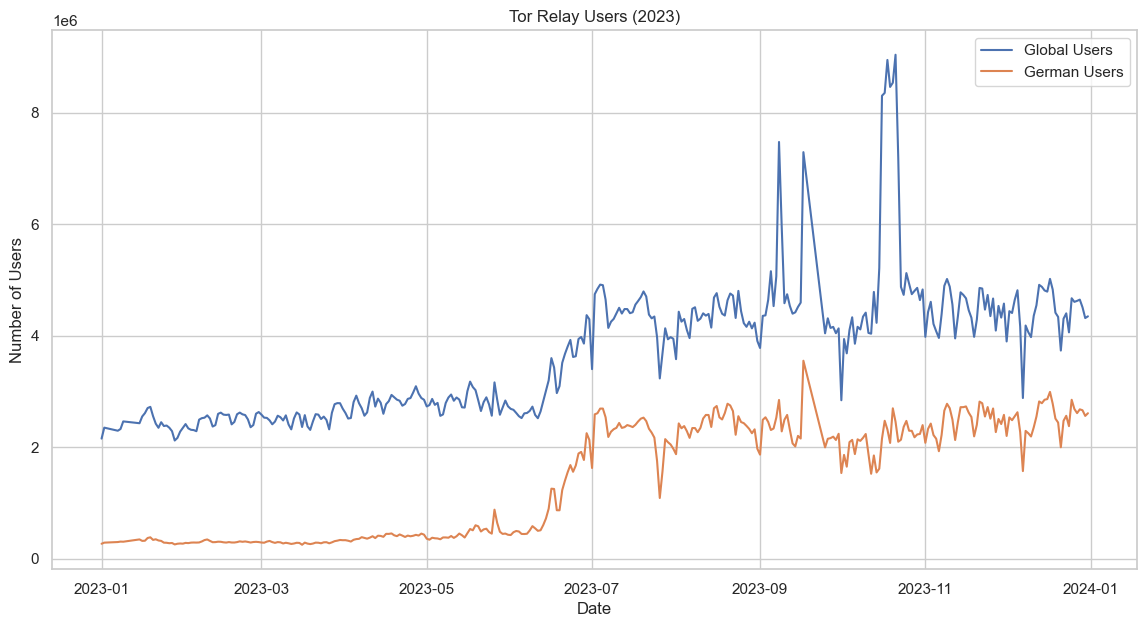

In [3]:
# Convert date columns to datetime objects
df_global['date'] = pd.to_datetime(df_global['date'])
df_germany['date'] = pd.to_datetime(df_germany['date'])
df_perf['date'] = pd.to_datetime(df_perf['date'])

# Plotting user counts
plt.figure(figsize=(14, 7))
plt.plot(df_global['date'], df_global['users'], label='Global Users')
plt.plot(df_germany['date'], df_germany['users'], label='German Users')
plt.title('Tor Relay Users (2023)')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend()
plt.show()

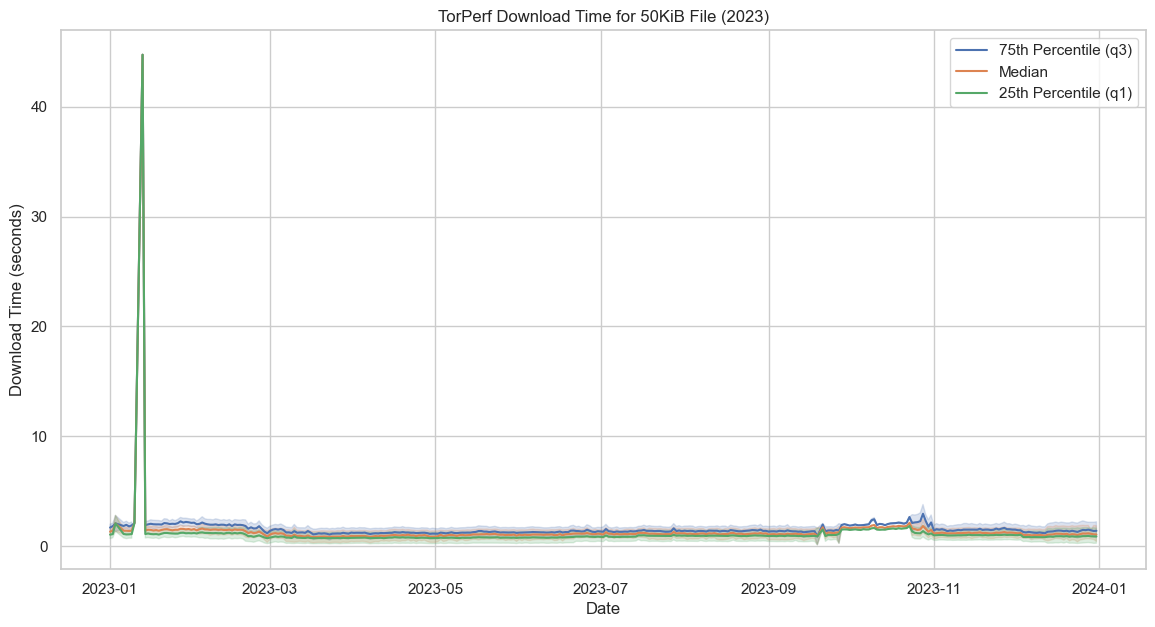

In [4]:
# Plotting TorPerf Data
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_perf, x='date', y='q3', label='75th Percentile (q3)')
sns.lineplot(data=df_perf, x='date', y='md', label='Median')
sns.lineplot(data=df_perf, x='date', y='q1', label='25th Percentile (q1)')
plt.title('TorPerf Download Time for 50KiB File (2023)')
plt.xlabel('Date')
plt.ylabel('Download Time (seconds)')
plt.legend()
plt.show()

### 4. Interpretation and Reporting
*Discuss your findings here. Relate them to Tor’s goals of anonymity and censorship resistance.*

*Reflect on the limitations of the data.*

*Suggest improvements or further research directions.*

### 5. References
[0] https://www.torproject.org
[1] https://metrics.torproject.org
[2] https://metrics.torproject.org/sources.html
[3] https://metrics.torproject.org/torperf.html
[4] https://data.niaid.nih.gov/resources?id=zenodo_10620519
[5] https://murdoch.is/papers/wecsr10measuring.pdf
[6] https://stem.torproject.org/
[7] https://www.rwails.org/research/jansen_gtt_arxiv24.pdf
[8] https://dl.acm.org/doi/10.1145/2976749.2978310